In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Carregar os dados
file_path = r'Dados/Regional Tapirus out23-mar24.xlsx'
df = pd.read_excel(file_path)

# Exibir as primeiras linhas para entender a estrutura
print(df.head())
print("\nColunas disponíveis:")
print(df.columns.tolist())

# Verificar se há valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

     id                    nome       lat       lon início do periodo [GMT-3]  \
0  5806  Regional Tapirus | NRD -22.50305 -51.31979          01/10/2023 00:00   
1  5806  Regional Tapirus | NRD -22.50305 -51.31979          02/10/2023 00:00   
2  5806  Regional Tapirus | NRD -22.50305 -51.31979          03/10/2023 00:00   
3  5806  Regional Tapirus | NRD -22.50305 -51.31979          04/10/2023 00:00   
4  5806  Regional Tapirus | NRD -22.50305 -51.31979          05/10/2023 00:00   

  final do periodo [GMT-3] Pic Inativa  precipitação [mm]  \
0         02/10/2023 00:00         Não                0.0   
1         03/10/2023 00:00         Não                0.0   
2         04/10/2023 00:00         Não                0.0   
3         05/10/2023 00:00         Não                0.0   
4         06/10/2023 00:00         Não                4.0   

   temperatura mínima [ºC]  temperatura média [ºC]  temperatura máxima [ºC]  \
0                     20.5                    25.0                 

c:\Users\matheus.rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


c:\Users\matheus.rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


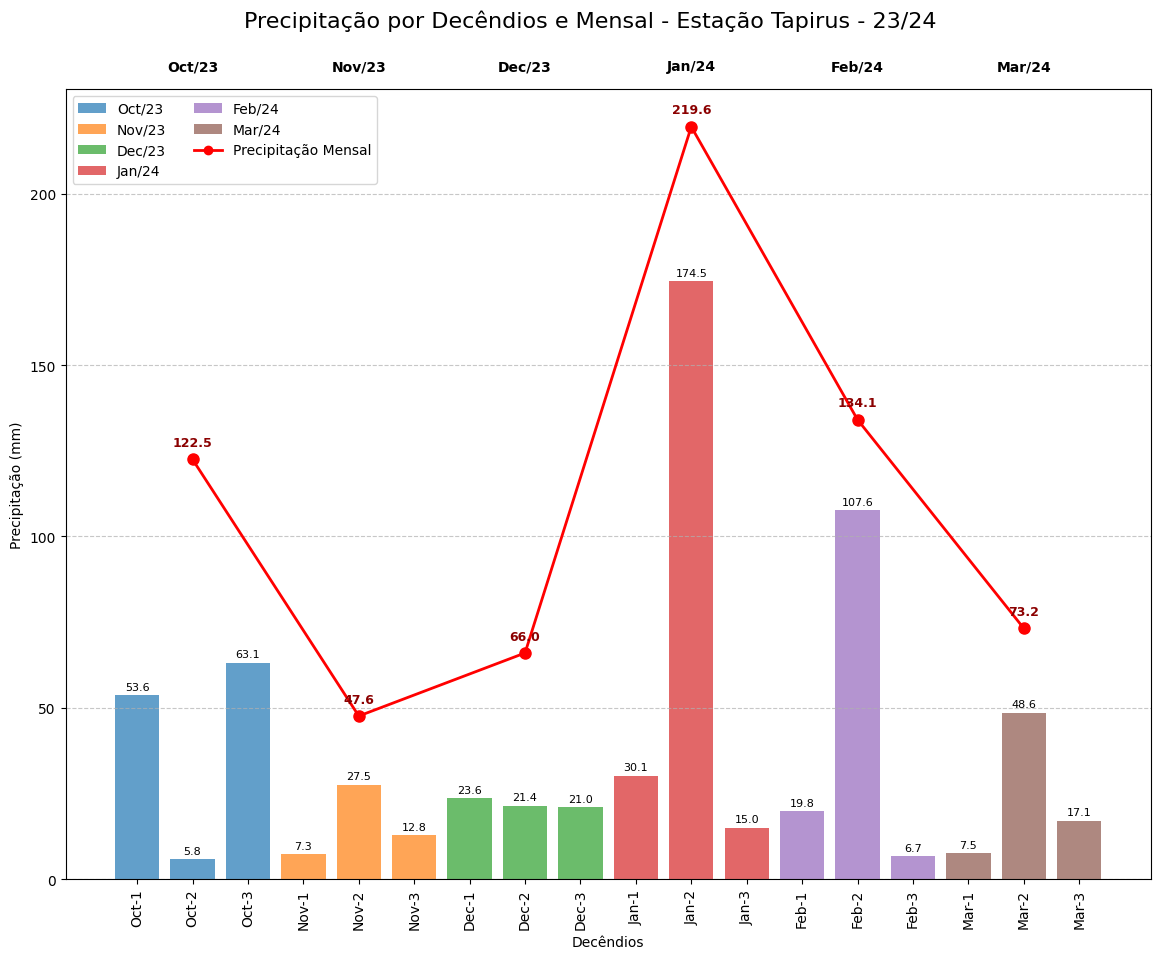

Gráfico gerado com sucesso!


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import calendar
import matplotlib.colors as mcolors

# Carregar os dados
file_path = r'Dados/Regional Tapirus out23-mar24.xlsx'
df = pd.read_excel(file_path)

# Converter as colunas de data para datetime com formato correto
df['início do periodo [GMT-3]'] = pd.to_datetime(df['início do periodo [GMT-3]'], dayfirst=True)
df['final do periodo [GMT-3]'] = pd.to_datetime(df['final do periodo [GMT-3]'], dayfirst=True)

# Adicionar coluna com o mês e o decêndio
df['mes'] = df['início do periodo [GMT-3]'].dt.month
df['ano'] = df['início do periodo [GMT-3]'].dt.year
df['dia'] = df['início do periodo [GMT-3]'].dt.day

# Determinar o decêndio (1-3) com base no dia do mês
def get_decendio(dia):
    if dia <= 10:
        return 1
    elif dia <= 20:
        return 2
    else:
        return 3

df['decendio'] = df['dia'].apply(get_decendio)

# Criar uma coluna para identificar o decêndio de forma única (combinação de ano, mês e decêndio)
df['decendio_id'] = df['ano'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2) + '-' + df['decendio'].astype(str)

# Criar uma coluna para identificar o mês de forma única (combinação de ano e mês)
df['mes_id'] = df['ano'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2)

# Agrupar por decêndio e calcular a precipitação total
decendio_precip = df.groupby('decendio_id')['precipitação [mm]'].sum().reset_index()

# Agrupar por mês e calcular a precipitação total
mes_precip = df.groupby('mes_id')['precipitação [mm]'].sum().reset_index()

# Extrair ano, mês e decêndio do decendio_id para ordenação
decendio_precip[['ano', 'mes', 'decendio']] = decendio_precip['decendio_id'].str.split('-', expand=True)
decendio_precip['ano'] = decendio_precip['ano'].astype(int)
decendio_precip['mes'] = decendio_precip['mes'].astype(int)
decendio_precip['decendio'] = decendio_precip['decendio'].astype(int)

# Ordenar por ano, mês e decêndio
decendio_precip = decendio_precip.sort_values(by=['ano', 'mes', 'decendio'])

# Extrair ano e mês do mes_id para ordenação
mes_precip[['ano', 'mes']] = mes_precip['mes_id'].str.split('-', expand=True)
mes_precip['ano'] = mes_precip['ano'].astype(int)
mes_precip['mes'] = mes_precip['mes'].astype(int)

# Ordenar por ano e mês
mes_precip = mes_precip.sort_values(by=['ano', 'mes'])

# Definir cores para cada mês
# Usando uma paleta de cores que seja visualmente distinta
colors = list(plt.cm.tab10.colors) + list(plt.cm.Set2.colors) + list(plt.cm.Set3.colors)
# Criar um dicionário de cores para cada combinação única de ano-mês
unique_months = decendio_precip[['ano', 'mes']].drop_duplicates().sort_values(by=['ano', 'mes'])
month_colors = {}
for i, (_, row) in enumerate(unique_months.iterrows()):
    month_key = (row['ano'], row['mes'])
    month_colors[month_key] = colors[i % len(colors)]

# Configurar o gráfico
plt.figure(figsize=(14, 10))  # Aumentar a altura do gráfico
ax = plt.gca()

# Criar barras com cores diferentes para cada mês
bar_colors = [month_colors[(row['ano'], row['mes'])] for _, row in decendio_precip.iterrows()]
bars = ax.bar(range(len(decendio_precip)), decendio_precip['precipitação [mm]'], 
               color=bar_colors, alpha=0.7)

# Criar um dicionário para armazenar as posições dos decêndios por mês
month_decendio_positions = {}
for i, (_, row) in enumerate(decendio_precip.iterrows()):
    month_key = (row['ano'], row['mes'])
    if month_key not in month_decendio_positions:
        month_decendio_positions[month_key] = {}
    month_decendio_positions[month_key][row['decendio']] = i

# Encontrar as posições dos segundos decêndios de cada mês para a linha mensal
line_positions = []
for _, row in mes_precip.iterrows():
    month_key = (row['ano'], row['mes'])
    if month_key in month_decendio_positions and 2 in month_decendio_positions[month_key]:
        # Usar a posição do segundo decêndio
        line_positions.append(month_decendio_positions[month_key][2])
    elif month_key in month_decendio_positions:
        # Se não tiver o segundo decêndio, usar outro disponível
        available_decendios = list(month_decendio_positions[month_key].keys())
        if available_decendios:
            # Usar o primeiro decêndio disponível
            line_positions.append(month_decendio_positions[month_key][available_decendios[0]])
        else:
            line_positions.append(None)  # Não deve acontecer
    else:
        line_positions.append(None)  # Não deve acontecer

# Remover posições None (se houver)
valid_positions = []
valid_precipitations = []
for pos, precip in zip(line_positions, mes_precip['precipitação [mm]']):
    if pos is not None:
        valid_positions.append(pos)
        valid_precipitations.append(precip)

# Desenhar a linha de precipitação mensal
line = ax.plot(valid_positions, valid_precipitations, 
         color='red', marker='o', linewidth=2, markersize=8, label='Precipitação Mensal')

# Criar labels para o eixo x
x_labels = []
x_ticks = []
month_label_positions = {}

for i, (_, row) in enumerate(decendio_precip.iterrows()):
    mes_nome = calendar.month_abbr[row['mes']]
    decendio_label = f"{mes_nome}-{row['decendio']}"
    x_labels.append(decendio_label)
    x_ticks.append(i)
    
    # Armazenar a posição do primeiro decêndio de cada mês para adicionar o rótulo do mês
    month_key = (row['ano'], row['mes'])
    if month_key not in month_label_positions and row['decendio'] == 1:
        month_label_positions[month_key] = i

# Configurar o eixo x
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlabel('Decêndios')
ax.set_ylabel('Precipitação (mm)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de mês acima dos decêndios
for month_key, position in month_label_positions.items():
    ano, mes = month_key
    mes_nome = calendar.month_abbr[mes]
    mes_label = f"{mes_nome}/{str(ano)[2:]}"
    
    # Calcular a posição média do mês (centro dos seus decêndios)
    decendio_positions = list(month_decendio_positions[month_key].values())
    month_center = sum(decendio_positions) / len(decendio_positions)
    
    # Adicionar texto do mês acima do gráfico
    ax.text(month_center, ax.get_ylim()[1] * 1.02, mes_label, 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adicionar título e legenda
# Usar suptitle para posicionar o título acima do gráfico com espaço extra
plt.suptitle('Precipitação por Decêndios e Mensal - Estação Tapirus - 23/24', fontsize=16, y=0.98)

# Criar legendas personalizadas para os meses
legend_elements = []
for (ano, mes), color in month_colors.items():
    mes_nome = calendar.month_abbr[mes]
    legend_elements.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.7, 
                          label=f'{mes_nome}/{str(ano)[2:]}'))
legend_elements.append(plt.Line2D([0], [0], color='red', marker='o', linewidth=2, 
                      label='Precipitação Mensal'))

# Adicionar a legenda com as cores dos meses
ax.legend(handles=legend_elements, loc='upper left', ncol=2)

# Ajustar o layout com espaço extra no topo para os rótulos de mês e título
plt.subplots_adjust(top=0.9)

# Adicionar valores nas barras
for i, v in enumerate(decendio_precip['precipitação [mm]']):
    if v > 0:  # Apenas mostrar valores maiores que zero
        ax.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontsize=8, rotation=0)

# Adicionar valores na linha de precipitação mensal
for pos, v in zip(valid_positions, valid_precipitations):
    if v > 0:  # Apenas mostrar valores maiores que zero
        ax.text(pos, v + 3, f'{v:.1f}', ha='center', va='bottom', 
                fontsize=9, color='darkred', fontweight='bold')

# Mostrar o gráfico
# Remover tight_layout() pois ele pode interferir com o subplots_adjust
plt.show()

c:\Users\matheus.rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


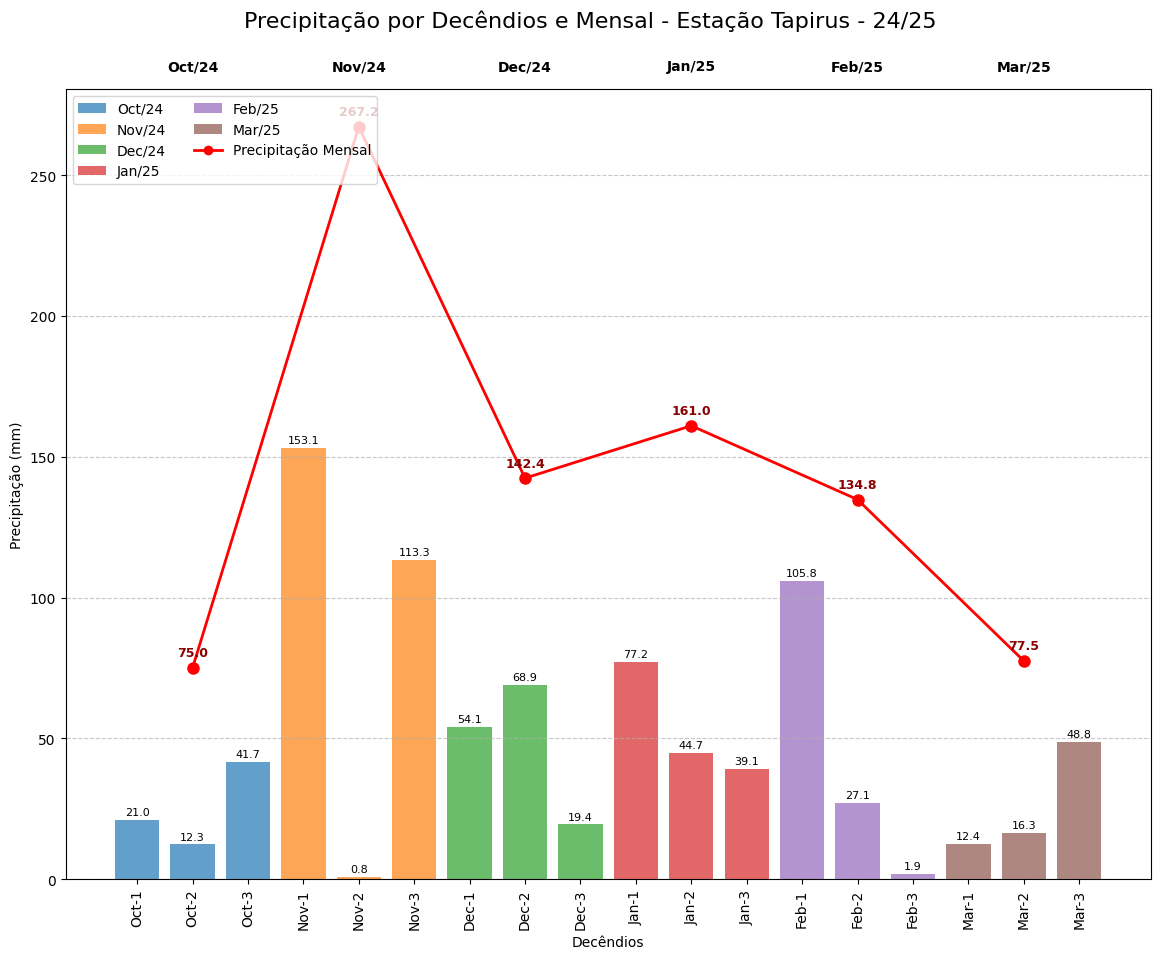

Gráfico gerado com sucesso!


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import calendar
import matplotlib.colors as mcolors

# Carregar os dados
file_path = r'Dados/Regional Tapirus out24-mar25.xlsx'
df = pd.read_excel(file_path)

# Converter as colunas de data para datetime com formato correto
df['início do periodo [GMT-3]'] = pd.to_datetime(df['início do periodo [GMT-3]'], dayfirst=True)
df['final do periodo [GMT-3]'] = pd.to_datetime(df['final do periodo [GMT-3]'], dayfirst=True)

# Adicionar coluna com o mês e o decêndio
df['mes'] = df['início do periodo [GMT-3]'].dt.month
df['ano'] = df['início do periodo [GMT-3]'].dt.year
df['dia'] = df['início do periodo [GMT-3]'].dt.day

# Determinar o decêndio (1-3) com base no dia do mês
def get_decendio(dia):
    if dia <= 10:
        return 1
    elif dia <= 20:
        return 2
    else:
        return 3

df['decendio'] = df['dia'].apply(get_decendio)

# Criar uma coluna para identificar o decêndio de forma única (combinação de ano, mês e decêndio)
df['decendio_id'] = df['ano'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2) + '-' + df['decendio'].astype(str)

# Criar uma coluna para identificar o mês de forma única (combinação de ano e mês)
df['mes_id'] = df['ano'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2)

# Agrupar por decêndio e calcular a precipitação total
decendio_precip = df.groupby('decendio_id')['precipitação [mm]'].sum().reset_index()

# Agrupar por mês e calcular a precipitação total
mes_precip = df.groupby('mes_id')['precipitação [mm]'].sum().reset_index()

# Extrair ano, mês e decêndio do decendio_id para ordenação
decendio_precip[['ano', 'mes', 'decendio']] = decendio_precip['decendio_id'].str.split('-', expand=True)
decendio_precip['ano'] = decendio_precip['ano'].astype(int)
decendio_precip['mes'] = decendio_precip['mes'].astype(int)
decendio_precip['decendio'] = decendio_precip['decendio'].astype(int)

# Ordenar por ano, mês e decêndio
decendio_precip = decendio_precip.sort_values(by=['ano', 'mes', 'decendio'])

# Extrair ano e mês do mes_id para ordenação
mes_precip[['ano', 'mes']] = mes_precip['mes_id'].str.split('-', expand=True)
mes_precip['ano'] = mes_precip['ano'].astype(int)
mes_precip['mes'] = mes_precip['mes'].astype(int)

# Ordenar por ano e mês
mes_precip = mes_precip.sort_values(by=['ano', 'mes'])

# Definir cores para cada mês
# Usando uma paleta de cores que seja visualmente distinta
colors = list(plt.cm.tab10.colors) + list(plt.cm.Set2.colors) + list(plt.cm.Set3.colors)
# Criar um dicionário de cores para cada combinação única de ano-mês
unique_months = decendio_precip[['ano', 'mes']].drop_duplicates().sort_values(by=['ano', 'mes'])
month_colors = {}
for i, (_, row) in enumerate(unique_months.iterrows()):
    month_key = (row['ano'], row['mes'])
    month_colors[month_key] = colors[i % len(colors)]

# Configurar o gráfico
plt.figure(figsize=(14, 10))  # Aumentar a altura do gráfico
ax = plt.gca()

# Criar barras com cores diferentes para cada mês
bar_colors = [month_colors[(row['ano'], row['mes'])] for _, row in decendio_precip.iterrows()]
bars = ax.bar(range(len(decendio_precip)), decendio_precip['precipitação [mm]'], 
               color=bar_colors, alpha=0.7)

# Criar um dicionário para armazenar as posições dos decêndios por mês
month_decendio_positions = {}
for i, (_, row) in enumerate(decendio_precip.iterrows()):
    month_key = (row['ano'], row['mes'])
    if month_key not in month_decendio_positions:
        month_decendio_positions[month_key] = {}
    month_decendio_positions[month_key][row['decendio']] = i

# Encontrar as posições dos segundos decêndios de cada mês para a linha mensal
line_positions = []
for _, row in mes_precip.iterrows():
    month_key = (row['ano'], row['mes'])
    if month_key in month_decendio_positions and 2 in month_decendio_positions[month_key]:
        # Usar a posição do segundo decêndio
        line_positions.append(month_decendio_positions[month_key][2])
    elif month_key in month_decendio_positions:
        # Se não tiver o segundo decêndio, usar outro disponível
        available_decendios = list(month_decendio_positions[month_key].keys())
        if available_decendios:
            # Usar o primeiro decêndio disponível
            line_positions.append(month_decendio_positions[month_key][available_decendios[0]])
        else:
            line_positions.append(None)  # Não deve acontecer
    else:
        line_positions.append(None)  # Não deve acontecer

# Remover posições None (se houver)
valid_positions = []
valid_precipitations = []
for pos, precip in zip(line_positions, mes_precip['precipitação [mm]']):
    if pos is not None:
        valid_positions.append(pos)
        valid_precipitations.append(precip)

# Desenhar a linha de precipitação mensal
line = ax.plot(valid_positions, valid_precipitations, 
         color='red', marker='o', linewidth=2, markersize=8, label='Precipitação Mensal')

# Criar labels para o eixo x
x_labels = []
x_ticks = []
month_label_positions = {}

for i, (_, row) in enumerate(decendio_precip.iterrows()):
    mes_nome = calendar.month_abbr[row['mes']]
    decendio_label = f"{mes_nome}-{row['decendio']}"
    x_labels.append(decendio_label)
    x_ticks.append(i)
    
    # Armazenar a posição do primeiro decêndio de cada mês para adicionar o rótulo do mês
    month_key = (row['ano'], row['mes'])
    if month_key not in month_label_positions and row['decendio'] == 1:
        month_label_positions[month_key] = i

# Configurar o eixo x
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlabel('Decêndios')
ax.set_ylabel('Precipitação (mm)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de mês acima dos decêndios
for month_key, position in month_label_positions.items():
    ano, mes = month_key
    mes_nome = calendar.month_abbr[mes]
    mes_label = f"{mes_nome}/{str(ano)[2:]}"
    
    # Calcular a posição média do mês (centro dos seus decêndios)
    decendio_positions = list(month_decendio_positions[month_key].values())
    month_center = sum(decendio_positions) / len(decendio_positions)
    
    # Adicionar texto do mês acima do gráfico
    ax.text(month_center, ax.get_ylim()[1] * 1.02, mes_label, 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adicionar título e legenda
# Usar suptitle para posicionar o título acima do gráfico com espaço extra
plt.suptitle('Precipitação por Decêndios e Mensal - Estação Tapirus - 24/25', fontsize=16, y=0.98)

# Criar legendas personalizadas para os meses
legend_elements = []
for (ano, mes), color in month_colors.items():
    mes_nome = calendar.month_abbr[mes]
    legend_elements.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.7, 
                          label=f'{mes_nome}/{str(ano)[2:]}'))
legend_elements.append(plt.Line2D([0], [0], color='red', marker='o', linewidth=2, 
                      label='Precipitação Mensal'))

# Adicionar a legenda com as cores dos meses
ax.legend(handles=legend_elements, loc='upper left', ncol=2)

# Ajustar o layout com espaço extra no topo para os rótulos de mês e título
plt.subplots_adjust(top=0.9)

# Adicionar valores nas barras
for i, v in enumerate(decendio_precip['precipitação [mm]']):
    if v > 0:  # Apenas mostrar valores maiores que zero
        ax.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontsize=8, rotation=0)

# Adicionar valores na linha de precipitação mensal
for pos, v in zip(valid_positions, valid_precipitations):
    if v > 0:  # Apenas mostrar valores maiores que zero
        ax.text(pos, v + 3, f'{v:.1f}', ha='center', va='bottom', 
                fontsize=9, color='darkred', fontweight='bold')

# Mostrar o gráfico
# Remover tight_layout() pois ele pode interferir com o subplots_adjust
plt.show()